In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [50]:
train= pd.read_csv("data_set_ALL_AML_train.csv")
test= pd.read_csv("data_set_ALL_AML_independent.csv")
cancer_patient= pd.read_csv("actual.csv")

In [51]:
train.head(3)

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A


In [52]:
test.head(3)

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A


In [53]:

print(train.columns)
print("\n")
print(test.columns)


Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '34', 'call.27', '35', 'call.28', '36', 'call.29', '37', 'call.30',
       '38', 'call.31', '28', 'call.32', '29', 'call.33', '30', 'call.34',
       '31', 'call.35', '32', 'call.36', '33', 'call.37'],
      dtype='object')


Index(['Gene Description', 'Gene Accession Number', '39', 'call', '40',
       'call.1', '42', 'call.2', '47', 'call.3', '48', 'call.4', '49',
       'call.5', '41', 'call.6', '43', 'call.7', '44', 'call.8', '45',
       'call.9', '46'

In [54]:
train_cols = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', 
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

test_cols = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

In [55]:
train_to_keep=[col for col in train.columns if 'call' not in col]
test_to_keep=[col for col in test.columns if 'call' not in col]

In [56]:
X_train_df=train[train_to_keep]
X_test_df=test[test_to_keep]

In [57]:
X_train_df.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [58]:
X_train_df = X_train_df.reindex(columns=train_cols)
X_test_df = X_test_df.reindex(columns=test_cols)

In [59]:
X_train_df

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,15,-318,-32,-124,-135,-20,7,-213,-25,-72
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,2,-95,49,-37,-70,-50,-57,136,124,-1
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,193,312,230,330,337,101,132,318,325,392
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,782,1138,627,250,645,1140,1799,...,279,737,588,1170,2315,834,752,1293,1733,1567
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,295,777,170,314,341,482,446,...,51,227,361,284,250,557,295,342,304,627
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,11,41,-50,14,26,10,59,...,6,-9,-26,39,-12,-12,28,26,12,21
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,76,228,126,56,193,369,781,...,2484,371,133,298,790,335,1558,246,3193,2520


In [60]:
X_train_df = X_train_df.T
X_test_df = X_test_df.T
print(X_train_df.shape)


(40, 7129)


In [61]:
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [62]:
cancer_patient['cancer'].value_counts()

ALL    47
AML    25
Name: cancer, dtype: int64

In [63]:
cancer_patient = cancer_patient.replace({"ALL":0 , 'AML':1})
labels = ['ALL','AML']

In [64]:
cancer_patient.head()

,patient,cancer
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [65]:
X_train_df.iloc[1]

0       AFFX-BioB-5_at
1       AFFX-BioB-M_at
2       AFFX-BioB-3_at
3       AFFX-BioC-5_at
4       AFFX-BioC-3_at
             ...      
7124         X83863_at
7125         Z17240_at
7126       L49218_f_at
7127       M71243_f_at
7128       Z78285_f_at
Name: Gene Accession Number, Length: 7129, dtype: object

In [66]:
X_train_df.columns = X_train_df.iloc[1]
X_train_df = X_train_df.drop(['Gene Description', 'Gene Accession Number']).apply(pd.to_numeric)

X_test_df.columns = X_test_df.iloc[1]
X_test_df = X_test_df.drop(['Gene Description', 'Gene Accession Number']).apply(pd.to_numeric)

print(X_train_df.shape)
print(X_test_df.shape)
print(cancer_patient.shape)
X_train_df.head()

(38, 7129)
(34, 7129)
(72, 2)


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [46]:
from sklearn.model_selection import train_test_split

# splitting into train test data 

In [67]:
X_train = X_train_df.reset_index(drop=True)
y_train = cancer_patient[cancer_patient.patient<=38].reset_index(drop=True)
print(X_train.shape)

X_test = X_test_df.reset_index(drop=True)
y_test = cancer_patient[cancer_patient.patient>38].reset_index(drop=True)

(38, 7129)


In [68]:
X_train.describe()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-120.868421,-150.526316,-17.157895,181.394737,-276.552632,-439.210526,-43.578947,-201.184211,99.052632,112.131579,...,178.763158,750.842105,8.815789,399.131579,-20.052632,869.052632,335.842105,19.210526,504.394737,-29.210526
std,109.555656,75.734507,117.686144,117.468004,111.004431,135.458412,219.482393,90.838989,83.178397,211.815597,...,84.826830,298.008392,77.108507,469.579868,42.346031,482.366461,209.826766,31.158841,728.744405,30.851132
min,-476.000000,-327.000000,-307.000000,-36.000000,-541.000000,-790.000000,-479.000000,-463.000000,-82.000000,-215.000000,...,30.000000,224.000000,-178.000000,36.000000,-112.000000,195.000000,41.000000,-50.000000,-2.000000,-94.000000
25%,-138.750000,-205.000000,-83.250000,81.250000,-374.250000,-547.000000,-169.000000,-239.250000,36.000000,-47.000000,...,120.000000,575.500000,-42.750000,174.500000,-48.000000,595.250000,232.750000,8.000000,136.000000,-42.750000
50%,-106.500000,-141.500000,-43.500000,200.000000,-263.000000,-426.500000,-33.500000,-185.500000,99.500000,70.500000,...,174.500000,700.000000,10.500000,266.000000,-18.000000,744.500000,308.500000,20.000000,243.500000,-26.000000
75%,-68.250000,-94.750000,47.250000,279.250000,-188.750000,-344.750000,79.000000,-144.750000,152.250000,242.750000,...,231.750000,969.500000,57.000000,451.750000,9.250000,1112.000000,389.500000,30.250000,487.250000,-11.500000
max,17.000000,-20.000000,265.000000,392.000000,-51.000000,-155.000000,419.000000,-24.000000,283.000000,561.000000,...,356.000000,1653.000000,218.000000,2527.000000,52.000000,2315.000000,1109.000000,115.000000,3193.000000,36.000000


In [69]:
X_train= X_train.astype('float64')
X_test = X_test.astype('float64')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [70]:
scaler = StandardScaler()
X_train_df_scaled = scaler.fit_transform(X_train_df)
X_test_df_scaled = scaler.fit_transform(X_test_df)

In [25]:
from mlxtend.plotting import plot_confusion_matrix

# KMeans Classifier

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2 , random_state=0).fit(X_train_scaled)
kmeans_pred = kmeans.predict(X_test_scaled)
accuracy_kmeans = accuracy_score(y_test.iloc[:,1],kmeans_pred)
cm_kmeans=confusion_matrix(y_test.iloc[:,1], kmeans_pred)
print("accuracy for KMeans Classifier is  : " ,accuracy_kmeans)
print("\n")
print(cm_kmeans ,  ": Confusion Matrix for KMeans")


accuracy for KMeans Classifier is  :  0.7058823529411765


[[16  4]
 [ 6  8]] : Confusion Matrix for KMeans


In [79]:
X_train_df.head()


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f08abc6ef90>)

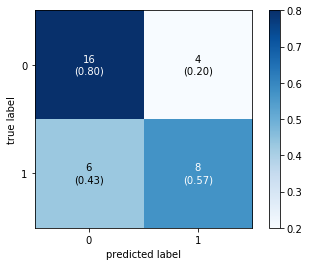

In [27]:
plot_confusion_matrix(cm_kmeans , show_absolute=True,
                                show_normed=True,
                                colorbar=True)

# Decision Tree Classifier

accuracy for DecisionTree Classifier :  0.9117647058823529


Confusion Matrix for DecisionTree Classifier :  (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7eff14084790>)


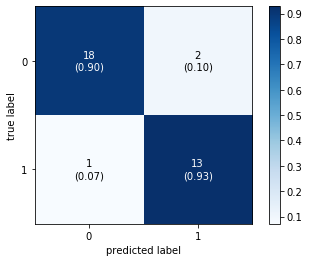

In [150]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train , y_train.iloc[:,1])
dtree_pred = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test.iloc[:,1],dtree_pred)
cm_dtree=confusion_matrix(y_test.iloc[:,1],dtree_pred)

print("accuracy for DecisionTree Classifier : " ,accuracy_dtree)
print("\n")
print("Confusion Matrix for DecisionTree Classifier : " ,plot_confusion_matrix(cm_dtree,show_absolute=True,show_normed=True,
                                                colorbar=True))




In [151]:
GCV_dtree = DecisionTreeClassifier()

In [100]:
parameters={
             "splitter":["best","random"] ,"max_depth": [ 2,3, 4, 5, 6, 8, 10,15,20],
             "min_samples_leaf" : [ 1,2,3,4,5,6 ],"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
             "max_features" : [None,"auto","log2","sqrt"],"max_leaf_nodes":[None,10,20,30,40,50,60,70,80]
            }

In [103]:
GCV_dtree=GridSearchCV(dtree,param_grid=parameters,scoring='accuracy',n_jobs=-1,cv=10,verbose=2)
GCV_dtree.fit(X_train_df,y_train.iloc[:,1])



Fitting 10 folds for each of 19440 candidates, totalling 194400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1645 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 4487 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 8449 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 13559 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 19789 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 27167 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 35665 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 45311 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 56077 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 67991 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 81025 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 95207 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 110509 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1269

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 8, 10, 15, 20],
                         'max_features': [None, 'auto', 'log2', 'sq

In [112]:
GCVdtree_pred = GCV_dtree.predict(X_test)
accuracy_GCVdtree = accuracy_score(GCVdtree_pred , y_test.iloc[:,1])
print("accuracy for GridsearchCV on DecisionTree is " , accuracy_GCVdtree )

accuracy for GridsearchCV on DecisionTree is  0.9117647058823529


# Naive Bayes Classifier

accuracy for naivebayes :  0.9117647058823529


Confusion Matrix for naive bayes :  (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7eff1f0a1c50>)


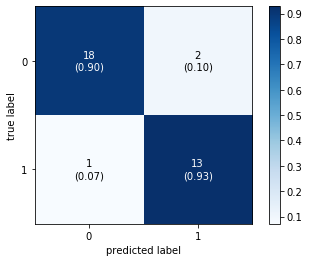

In [81]:
naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train.iloc[:,1])

naivebayes_pred = naive_bayes.predict(X_test)

accuracy_nb = accuracy_score(y_test.iloc[:,1],naivebayes_pred)
cm_nb=confusion_matrix(y_test.iloc[:,1], naivebayes_pred)

print("accuracy for naivebayes : " ,accuracy_nb)
print("\n")
print("Confusion Matrix for naive bayes : " ,plot_confusion_matrix(cm_nb,show_absolute=True,show_normed=True,
                                                colorbar=True))




# SVM Classifier 

/home/kartik/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters:
 {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'linear'}
accuracy for SVC is  :  0.7941176470588235


Confusion Matrix for SVC :  (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7eff1ec9bb50>)


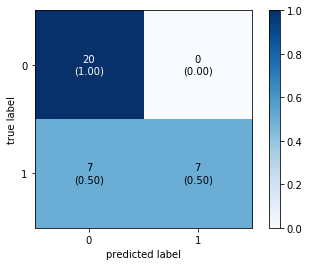

In [85]:
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.00001,1,10], "kernel": ["linear", "rbf", "poly"], "decision_function_shape" : ["ovo", "ovr"]} 

svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid.fit(X_train_df_scaled, y_train.iloc[:,1])
print("Best Parameters:\n", svm_grid.best_params_)
best_svc = svm_grid.best_estimator_
svm_pred = best_svc.predict(X_test_df_scaled)
accuracy_svc = accuracy_score(y_test.iloc[:,1],svm_pred)
cm_svc=confusion_matrix(y_test.iloc[:,1], svm_pred)

print("accuracy for SVC is  : " ,accuracy_svc)
print("\n")
print("Confusion Matrix for SVC : ",plot_confusion_matrix(cm_svc ,show_absolute=True,
                                show_normed=True,
                                colorbar=True))



# RandomForest Classifier


In [129]:
forest = RandomForestClassifier()

In [145]:
forest.fit(X_train , y_train.iloc[:,1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

accuracy for RandomForestClassifier is  :  0.9117647058823529


Confusion Matrix for RandomForestClassifier :  (<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7eff38c61910>)


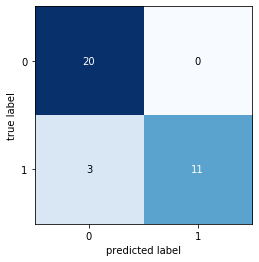

In [146]:
forest_pred = forest.predict(X_test)

accuracy_RF = accuracy_score(forest_pred , y_test.iloc[:,1])
cm_RF=confusion_matrix(y_test.iloc[:,1],forest_pred)

print("accuracy for RandomForestClassifier is  : " ,accuracy_RF)
print("\n")
print("Confusion Matrix for RandomForestClassifier : ", plot_confusion_matrix(cm_RF))


# RandomForest Classifier  with GridSearchCV


In [28]:
randomforest_params = {'bootstrap': [False, True],
         'n_estimators': [50,60, 70, 80, 90, 100],
         'max_features': [0.5,0.6,0.7,0.8],
         'min_samples_leaf': [2,4,6,8, 10, 12],
         'min_samples_split': [2,3,4,5,6]
        }

rf = RandomForestClassifier(random_state=0)

rf_model = GridSearchCV(estimator=rf, param_grid=randomforest_params, cv=5, scoring='accuracy')
rf_model.fit(X_train_df, y_train.iloc[:,1])

print("Best Parameters:\n", rf_model.best_params_)

rf_model_best = rf_model.best_estimator_
rf_pred = rf_model_best.predict(X_test)



KeyboardInterrupt: 

In [ ]:

accuracy_RFGCV = accuracy_score(y_test.iloc[:,1],rf_pred)
cm_RFGCV=confusion_matrix(y_test.iloc[:,1],rf_pred)

print("accuracy for RandomForestClassifier is  : " ,accuracy_RFGCV)
print("\n")
print("Confusion Matrix for RandomForestClassifier : ", plot_confusion_matrix(cm_RFGCV))


# XGBoost Classifier

In [ ]:
import xgboost as xgb

accuracy for XGBoost Classifier is  :  0.9117647058823529


Confusion Matrix for XGBoostClassifier :  (<Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7eff38b8ba90>)


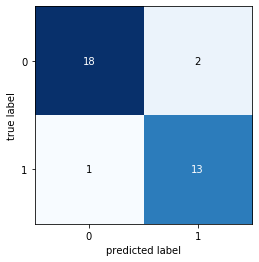

In [148]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train.iloc[:,1])
xgb_pred = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test.iloc[:,1], xgb_pred)
cm_xgb = confusion_matrix(y_test.iloc[:,1],xgb_pred)

print("accuracy for XGBoost Classifier is  : " ,accuracy_xgb)
print("\n")
print("Confusion Matrix for XGBoostClassifier : ", plot_confusion_matrix(cm_xgb))


# XGBoost Classifier with GridSearchCV

In [ ]:
parameters = {'max_depth': [2,3, 4, 5, 6, 7, 8, 10, 12],
               'min_child_weight': [ 2, 4, 6, 8, 10, 12, 15,20],
               'n_estimators': [20,30,40, 50, 60, 70, 80, 90, 100, 110, 120],
               'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3,0.4]}


xgb_gridsearch = GridSearchCV(xgb.XGBClassifier(random_state=42 , n_jobs=-1), 
                       param_grid = parameters, 
                       scoring = 'accuracy',
                       cv = 5)

xgb_gridsearch.fit(X_train_df, y_train.iloc[:,1])


In [ ]:

print("Best Parameters: ", xgb_gridsearch.best_params_)
print("\n")
print("Best Model by gridsearchCV : " xgb_gridsearch.best_estimator)


In [ ]:
xgbGCV_pred = xgb.predict(X_test)
print("\n")
print("accuracy score : ",accuracy_score(y_test.iloc[:1] , xgbGCV_pred))
cm_xgbGCV = confusion_matrix(y_test.iloc[:1] , xgbGCV_pred)
print("\n")

print("Confusion Matrix for XGBoostClassifier with GridSearchCV : ", plot_confusion_matrix(cm_xgbGCV))



# Artificial Neural Network Classification

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(7129,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

partial_X_train = X_train_scaled[:30]
X_val = X_train_scaled[30:]
y_train_label = y_train.iloc[:,1]
partial_y_train = y_train_label[:30]
y_val = y_train_label[30:]

es = EarlyStopping(monitor='val_loss', verbose=1, patience=3)

model.summary()




In [ ]:
model_history = model.fit(partial_X_train,
            partial_y_train,
            epochs=30,
            batch_size=4,
            validation_data=(X_val, y_val),
            callbacks=[es])

In [ ]:
ann_pred = model.predict_classes(X_test_scaled)


In [ ]:
accuracy_ann = accuracy_score(y_test.iloc[:,1], ann_pred)
cm_ann = confusion_matrix(y_test.iloc[:,1],ann_pred)

print("accuracy for ANN is  : " ,accuracy_ann)
print("\n")
print(cm_ann,  ": Confusion Matrix for ANN")
